In [ ]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [ ]:
import keras
keras.__version__

'2.4.3'

In [1]:
!unzip /content/drive/My\ Drive/새출발/png_조정.zip -d /content

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/폐렴png_조정/1f20a7b4-fc0d-49fa-8cc0-ecd516509372.png  
  inflating: /content/폐렴png_조정/1f393b78-0251-4f0c-8ca7-39fc54f8ddc2.png  
  inflating: /content/폐렴png_조정/1f447431-e2b3-4d18-8c22-30684ab71ffb.png  
  inflating: /content/폐렴png_조정/1f458170-a4e7-447f-a157-2b44e85f1e6c.png  
  inflating: /content/폐렴png_조정/1f45c8c0-4475-45e9-85e5-0cf139d0572b.png  
  inflating: /content/폐렴png_조정/1f4741e6-a0ae-41b2-8b70-bf7e927f1b13.png  
  inflating: /content/폐렴png_조정/1f493e1f-cd9f-455a-8b22-c77d042d6ac2.png  
  inflating: /content/폐렴png_조정/1f5f34b6-8e8d-4e25-88fc-6ba1b5b0ac06.png  
  inflating: /content/폐렴png_조정/1f7a3519-99e6-4466-9859-5e628bebff73.png  
  inflating: /content/폐렴png_조정/1f89239e-8271-4c33-abbc-7c018723b4c4.png  
  inflating: /content/폐렴png_조정/1fd15b31-7b21-483d-bbef-e9893d6a051b.png  
  inflating: /content/폐렴png_조정/1fd8e4db-3283-44a1-a591-6e3e49f248ab.png  
  inflating: /content/폐렴png_조정/1fd92186-f1fa-477d-b23e-abfd7ad537ce.png  
  

In [2]:
import numpy as np
import cv2  

In [3]:
np.random.seed(100)

In [4]:
def adjust_gamma(image, gamma=2):
   table = np.array([((i / 255.0) ** gamma) * 255
                     for i in np.arange(0, 256)]).astype("uint8")
   # apply gamma correction using the lookup table
   return cv2.LUT(image, table)

In [5]:
import os
os.mkdir('/content/test')
os.mkdir('/content/test/nor')
os.mkdir('/content/test/pneu')

os.mkdir('/content/train')
os.mkdir('/content/train/nor')
os.mkdir('/content/train/pneu')

In [6]:
for img_name in os.listdir('/content/폐렴png_조정/'):
    image_path='/content/폐렴png_조정/'+img_name
    #print(img_name)
    dst='/content/train/pneu/'+img_name
    img = cv2.imread(image_path,0)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img2 = clahe.apply(img)
    img2 = adjust_gamma(img2,2)
    img3 = cv2.resize(img2,(256,256))

    #cv2_imshow(img3)
    cv2.imwrite(dst,img3)

for img_name in os.listdir('/content/정상png_조정/'):
    image_path='/content/정상png_조정/'+img_name
    #print(img_name)
    dst='/content/train/nor/'+img_name
    img = cv2.imread(image_path,0)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img2 = clahe.apply(img)
    img2 = adjust_gamma(img2,2)
    img3 = cv2.resize(img2,(256,256))

    #cv2_imshow(img3)
    cv2.imwrite(dst,img3)

In [7]:
import shutil
i=0
for name in os.listdir('/content/train/nor'):
  src='/content/train/nor/'+name
  dst='/content/test/nor/'+name
  shutil.move(src,dst)
  i+=1
  if i>1423:
    break

i=0
for name in os.listdir('/content/train/pneu'):
  src='/content/train/pneu/'+name
  dst='/content/test/pneu/'+name
  shutil.move(src,dst)
  i+=1
  if i>800:
    break

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.05,rotation_range=3,shear_range=0.01,height_shift_range=0.03,width_shift_range=0.02, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory('/content/train',target_size=(256, 256),batch_size=32,color_mode='grayscale',class_mode='binary')
test_generator =test_datagen.flow_from_directory('/content/test',target_size=(256, 256),batch_size=32,color_mode='grayscale',class_mode='binary')

Found 12000 images belonging to 2 classes.
Found 2225 images belonging to 2 classes.


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.initializers  import VarianceScaling, glorot_normal
from keras.optimizers import Adam

In [12]:
#모델 생성
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(256,256,1), kernel_initializer=VarianceScaling(scale=2.0,distribution='normal')))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', kernel_initializer=VarianceScaling(scale=2.0,distribution='normal'))) 
model.add(MaxPooling2D(pool_size=(3,3), strides=(3,3)))
model.add(Conv2D(64,kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', kernel_initializer=VarianceScaling(scale=2.0,distribution='normal'))) 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', kernel_initializer=VarianceScaling(scale=2.0,distribution='normal'))) 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(256,kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', kernel_initializer=VarianceScaling(scale=2.0,distribution='normal'))) 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(512,kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', kernel_initializer=VarianceScaling(scale=2.0,distribution='normal')))
model.add(GlobalAveragePooling2D(data_format='channels_last'))
model.add(Dense(512, activation='relu', kernel_initializer=VarianceScaling(scale=2.0,distribution='normal')))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu', kernel_initializer=VarianceScaling(scale=2.0,distribution='normal')))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu', kernel_initializer=VarianceScaling(scale=2.0,distribution='normal')))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer=VarianceScaling(scale=2.0,distribution='normal')))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid', kernel_initializer=glorot_normal()))

In [13]:
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.000009), metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 17, 128)       7

In [ ]:
#학습시키기(using early stopping and modelcheckpoint)
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history = model.fit(train_generator,steps_per_epoch=375 , epochs=100, validation_data=test_generator, validation_steps=70, verbose=1, callbacks=[es, mc])

Epoch 1/100
375/375 [==============================] - ETA: 0s - loss: 0.9598 - accuracy: 0.5148
Epoch 00001: val_loss improved from inf to 0.52404, saving model to best_model.h5
375/375 [==============================] - 76s 202ms/step - loss: 0.9598 - accuracy: 0.5148 - val_loss: 0.5240 - val_accuracy: 0.8018
Epoch 2/100
375/375 [==============================] - ETA: 0s - loss: 0.7947 - accuracy: 0.6021
Epoch 00002: val_loss improved from 0.52404 to 0.43399, saving model to best_model.h5
375/375 [==============================] - 70s 188ms/step - loss: 0.7947 - accuracy: 0.6021 - val_loss: 0.4340 - val_accuracy: 0.8193
Epoch 3/100
375/375 [==============================] - ETA: 0s - loss: 0.6682 - accuracy: 0.6784
Epoch 00003: val_loss improved from 0.43399 to 0.40584, saving model to best_model.h5
375/375 [==============================] - 71s 190ms/step - loss: 0.6682 - accuracy: 0.6784 - val_loss: 0.4058 - val_accuracy: 0.8292
Epoch 4/100
375/375 [==============================] 

In [ ]:
#학습시키기(using early stopping and modelcheckpoint)
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history = model.fit(train_generator,steps_per_epoch=375 , epochs=30, validation_data=test_generator, validation_steps=70, verbose=1, callbacks=[es, mc])

Epoch 1/30
375/375 [==============================] - ETA: 0s - loss: 0.3666 - accuracy: 0.8548
Epoch 00001: val_loss improved from inf to 0.30493, saving model to best_model.h5
375/375 [==============================] - 74s 197ms/step - loss: 0.3666 - accuracy: 0.8548 - val_loss: 0.3049 - val_accuracy: 0.8876
Epoch 2/30
375/375 [==============================] - ETA: 0s - loss: 0.3750 - accuracy: 0.8587
Epoch 00002: val_loss did not improve from 0.30493
375/375 [==============================] - 75s 199ms/step - loss: 0.3750 - accuracy: 0.8587 - val_loss: 0.3589 - val_accuracy: 0.8593
Epoch 3/30
375/375 [==============================] - ETA: 0s - loss: 0.3621 - accuracy: 0.8578
Epoch 00003: val_loss improved from 0.30493 to 0.28395, saving model to best_model.h5
375/375 [==============================] - 75s 199ms/step - loss: 0.3621 - accuracy: 0.8578 - val_loss: 0.2839 - val_accuracy: 0.8840
Epoch 4/30
375/375 [==============================] - ETA: 0s - loss: 0.3604 - accuracy: 0.

In [ ]:
#학습시키기(using early stopping and modelcheckpoint)
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history = model.fit(train_generator,steps_per_epoch=375 , epochs=30, validation_data=test_generator, validation_steps=70, verbose=1, callbacks=[es, mc])

Epoch 1/30
375/375 [==============================] - ETA: 0s - loss: 0.2890 - accuracy: 0.8907
Epoch 00001: val_loss improved from inf to 0.25844, saving model to best_model.h5
375/375 [==============================] - 74s 196ms/step - loss: 0.2890 - accuracy: 0.8907 - val_loss: 0.2584 - val_accuracy: 0.8966
Epoch 2/30
375/375 [==============================] - ETA: 0s - loss: 0.2924 - accuracy: 0.8907
Epoch 00002: val_loss did not improve from 0.25844
375/375 [==============================] - 73s 195ms/step - loss: 0.2924 - accuracy: 0.8907 - val_loss: 0.2657 - val_accuracy: 0.8971
Epoch 3/30
375/375 [==============================] - ETA: 0s - loss: 0.2881 - accuracy: 0.8926
Epoch 00003: val_loss did not improve from 0.25844
375/375 [==============================] - 72s 192ms/step - loss: 0.2881 - accuracy: 0.8926 - val_loss: 0.2593 - val_accuracy: 0.8993
Epoch 4/30
375/375 [==============================] - ETA: 0s - loss: 0.2870 - accuracy: 0.8942
Epoch 00004: val_loss improved

In [ ]:
#학습시키기(using early stopping and modelcheckpoint)
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history = model.fit(train_generator,steps_per_epoch=375 , epochs=30, validation_data=test_generator, validation_steps=70, verbose=1, callbacks=[es, mc])

Epoch 1/30
375/375 [==============================] - ETA: 0s - loss: 0.2710 - accuracy: 0.9007
Epoch 00001: val_loss improved from inf to 0.24049, saving model to best_model.h5
375/375 [==============================] - 72s 192ms/step - loss: 0.2710 - accuracy: 0.9007 - val_loss: 0.2405 - val_accuracy: 0.9025
Epoch 2/30
375/375 [==============================] - ETA: 0s - loss: 0.2634 - accuracy: 0.9012
Epoch 00002: val_loss improved from 0.24049 to 0.23419, saving model to best_model.h5
375/375 [==============================] - 72s 192ms/step - loss: 0.2634 - accuracy: 0.9012 - val_loss: 0.2342 - val_accuracy: 0.9043
Epoch 3/30
375/375 [==============================] - ETA: 0s - loss: 0.2657 - accuracy: 0.9002
Epoch 00003: val_loss did not improve from 0.23419
375/375 [==============================] - 72s 192ms/step - loss: 0.2657 - accuracy: 0.9002 - val_loss: 0.2642 - val_accuracy: 0.8984
Epoch 4/30
375/375 [==============================] - ETA: 0s - loss: 0.2685 - accuracy: 0.

In [ ]:
#학습시키기(using early stopping and modelcheckpoint)
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history = model.fit(train_generator,steps_per_epoch=375 , epochs=30, validation_data=test_generator, validation_steps=70, verbose=1, callbacks=[es, mc])

Epoch 1/30
375/375 [==============================] - ETA: 0s - loss: 0.2401 - accuracy: 0.9103
Epoch 00001: val_loss improved from inf to 0.26673, saving model to best_model.h5
375/375 [==============================] - 73s 193ms/step - loss: 0.2401 - accuracy: 0.9103 - val_loss: 0.2667 - val_accuracy: 0.9016
Epoch 2/30
375/375 [==============================] - ETA: 0s - loss: 0.2422 - accuracy: 0.9113
Epoch 00002: val_loss improved from 0.26673 to 0.23691, saving model to best_model.h5
375/375 [==============================] - 73s 194ms/step - loss: 0.2422 - accuracy: 0.9113 - val_loss: 0.2369 - val_accuracy: 0.9029
Epoch 3/30
375/375 [==============================] - ETA: 0s - loss: 0.2406 - accuracy: 0.9122
Epoch 00003: val_loss improved from 0.23691 to 0.22115, saving model to best_model.h5
375/375 [==============================] - 72s 191ms/step - loss: 0.2406 - accuracy: 0.9122 - val_loss: 0.2211 - val_accuracy: 0.9079
Epoch 4/30
375/375 [==============================] - ET

In [ ]:
%%time
history = model.fit(train_generator,steps_per_epoch=375 , epochs=45, validation_data=test_generator, validation_steps=70, verbose=1)

Epoch 1/45
375/375 [==============================] - 71s 188ms/step - loss: 0.9373 - accuracy: 0.5268 - val_loss: 0.6173 - val_accuracy: 0.6413
Epoch 2/45
375/375 [==============================] - 73s 195ms/step - loss: 0.8452 - accuracy: 0.5696 - val_loss: 0.5509 - val_accuracy: 0.6674
Epoch 3/45
375/375 [==============================] - 71s 189ms/step - loss: 0.7086 - accuracy: 0.6451 - val_loss: 0.4327 - val_accuracy: 0.8072
Epoch 4/45
375/375 [==============================] - 71s 189ms/step - loss: 0.6361 - accuracy: 0.6926 - val_loss: 0.3886 - val_accuracy: 0.8391
Epoch 5/45
375/375 [==============================] - 71s 189ms/step - loss: 0.5864 - accuracy: 0.7319 - val_loss: 0.3803 - val_accuracy: 0.8454
Epoch 6/45
375/375 [==============================] - 71s 189ms/step - loss: 0.5476 - accuracy: 0.7528 - val_loss: 0.3713 - val_accuracy: 0.8481
Epoch 7/45
375/375 [==============================] - 72s 192ms/step - loss: 0.5324 - accuracy: 0.7718 - val_loss: 0.3794 - val_ac

In [ ]:
%%time
history = model.fit(train_generator,steps_per_epoch=375 , epochs=5, validation_data=test_generator, validation_steps=70, verbose=1)

Epoch 1/5
375/375 [==============================] - 75s 201ms/step - loss: 0.2905 - accuracy: 0.8886 - val_loss: 0.2675 - val_accuracy: 0.8971
Epoch 2/5
375/375 [==============================] - 76s 201ms/step - loss: 0.2948 - accuracy: 0.8899 - val_loss: 0.2690 - val_accuracy: 0.9020
Epoch 3/5
375/375 [==============================] - 75s 200ms/step - loss: 0.2836 - accuracy: 0.8927 - val_loss: 0.2646 - val_accuracy: 0.8935
Epoch 4/5
375/375 [==============================] - 75s 200ms/step - loss: 0.2882 - accuracy: 0.8899 - val_loss: 0.2691 - val_accuracy: 0.8975
Epoch 5/5
375/375 [==============================] - 75s 200ms/step - loss: 0.2819 - accuracy: 0.8938 - val_loss: 0.2502 - val_accuracy: 0.9043
CPU times: user 7min 19s, sys: 34.7 s, total: 7min 53s
Wall time: 6min 16s


In [15]:
#여기만 실행하면됨
%%time
history = model.fit(train_generator,steps_per_epoch=375 , epochs=50, validation_data=test_generator, validation_steps=70, verbose=1)

Epoch 1/50
375/375 [==============================] - 75s 199ms/step - loss: 0.9897 - accuracy: 0.5141 - val_loss: 0.5601 - val_accuracy: 0.8013
Epoch 2/50
375/375 [==============================] - 70s 186ms/step - loss: 0.8667 - accuracy: 0.5783 - val_loss: 0.4727 - val_accuracy: 0.8166
Epoch 3/50
375/375 [==============================] - 69s 184ms/step - loss: 0.7368 - accuracy: 0.6476 - val_loss: 0.4360 - val_accuracy: 0.8126
Epoch 4/50
375/375 [==============================] - 68s 182ms/step - loss: 0.6355 - accuracy: 0.6986 - val_loss: 0.3776 - val_accuracy: 0.8476
Epoch 5/50
375/375 [==============================] - 69s 183ms/step - loss: 0.5875 - accuracy: 0.7313 - val_loss: 0.3676 - val_accuracy: 0.8490
Epoch 6/50
375/375 [==============================] - 69s 183ms/step - loss: 0.5532 - accuracy: 0.7522 - val_loss: 0.3488 - val_accuracy: 0.8557
Epoch 7/50
375/375 [==============================] - 69s 183ms/step - loss: 0.5335 - accuracy: 0.7670 - val_loss: 0.3473 - val_ac

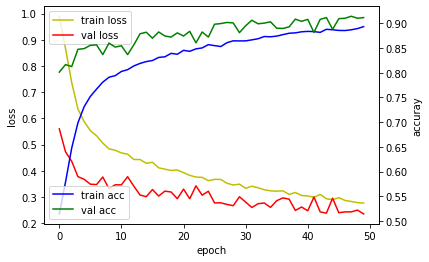

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [21]:
'''
%%time
for i in range(10):
  history = model.fit(train_generator,steps_per_epoch=375 , epochs=1, verbose=1) 
  score =model.evaluate_generator(test_generator)
  print("test %s: %.2f%%   test %s: %.2f%%" %(model.metrics_names[1], score[1]*100,model.metrics_names[0],score[0]*100))
  if score[1] > 0.9173 :
      break
'''

375/375 [==============================] - 65s 174ms/step - loss: 0.2733 - accuracy: 0.8927
test accuracy: 88.99%   test loss: 28.22%
375/375 [==============================] - 66s 175ms/step - loss: 0.2685 - accuracy: 0.8951
test accuracy: 89.39%   test loss: 28.65%
375/375 [==============================] - 65s 174ms/step - loss: 0.2679 - accuracy: 0.8987
test accuracy: 89.84%   test loss: 26.32%
375/375 [==============================] - 65s 174ms/step - loss: 0.2682 - accuracy: 0.8963
test accuracy: 91.87%   test loss: 23.08%
CPU times: user 5min 17s, sys: 24.6 s, total: 5min 41s
Wall time: 4min 34s


In [24]:
#CLAHE & gamma correction 적용
for img_name in os.listdir('/content/폐렴png_test_조정/'):
    image_path='/content/폐렴png_test_조정/'+img_name
    #print(img_name)
    dst='/content/test/pneu/'+img_name
    img = cv2.imread(image_path,0)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img2 = clahe.apply(img)
    img2 = adjust_gamma(img2,2)
    img3 = cv2.resize(img2,(256,256))

    #cv2_imshow(img3)
    cv2.imwrite(dst,img3)

#CLAHE & gamma correction 적용
for img_name in os.listdir('/content/정상png_test_조정/'):
    image_path='/content/정상png_test_조정/'+img_name
    #print(img_name)
    dst='/content/test/nor/'+img_name
    img = cv2.imread(image_path,0)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img2 = clahe.apply(img)
    img2 = adjust_gamma(img2,2)
    img3 = cv2.resize(img2,(256,256))

    #cv2_imshow(img3)
    cv2.imwrite(dst,img3)

In [25]:
test_generator =test_datagen.flow_from_directory('/content/test',target_size=(256, 256),batch_size=32,color_mode='grayscale',class_mode='binary')

Found 2861 images belonging to 2 classes.


In [26]:
score =model.evaluate_generator(test_generator)
print("test %s: %.2f%%   test %s: %.2f%%" %(model.metrics_names[1], score[1]*100,model.metrics_names[0],score[0]*100))

test accuracy: 88.29%   test loss: 31.28%


In [17]:
#모델 저장
model_json = model.to_json()
with open("/content/drive/My Drive/성능테스트/전처리모델2.json", "w") as json_file:
    json_file.write(model_json)

In [18]:
#가중치 저장
model.save_weights("/content/drive/My Drive/성능테스트/전처리모델2.h5")

In [ ]:
#모델 로드
from keras.models import model_from_json 
json_file = open("/content/drive/My Drive/성능테스트/전처리모델.json", "r") 
loaded_model_json = json_file.read() 
json_file.close() 
model = model_from_json(loaded_model_json)

In [22]:
model.load_weights("/content/drive/My Drive/성능테스트/전처리모델2.h5") 
print("Loaded model from disk")

Loaded model from disk


In [27]:
!unzip /content/drive/My\ Drive/새출발/광저우어린이.zip -d /content

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/NORMAL/NORMAL2-IM-0412-0001.jpeg  
  inflating: /content/NORMAL/NORMAL2-IM-0413-0001.jpeg  
  inflating: /content/NORMAL/NORMAL2-IM-0414-0001.jpeg  
  inflating: /content/NORMAL/NORMAL2-IM-0415-0001.jpeg  
  inflating: /content/NORMAL/NORMAL2-IM-0416-0001-0001.jpeg  
  inflating: /content/NORMAL/NORMAL2-IM-0416-0001-0002.jpeg  
  inflating: /content/NORMAL/NORMAL2-IM-0416-0001.jpeg  
  inflating: /content/NORMAL/NORMAL2-IM-0417-0001.jpeg  
  inflating: /content/NORMAL/NORMAL2-IM-0418-0001.jpeg  
  inflating: /content/NORMAL/NORMAL2-IM-0419-0001.jpeg  
  inflating: /content/NORMAL/NORMAL2-IM-0421-0001.jpeg  
  inflating: /content/NORMAL/NORMAL2-IM-0423-0001.jpeg  
  inflating: /content/NORMAL/NORMAL2-IM-0424-0001.jpeg  
  inflating: /content/NORMAL/NORMAL2-IM-0425-0001.jpeg  
  inflating: /content/NORMAL/NORMAL2-IM-0427-0001.jpeg  
  inflating: /content/NORMAL/NORMAL2-IM-0428-0001.jpeg  
  inflating: /content/NORMAL/NORMAL2-IM-04

In [ ]:
import os

In [28]:
os.mkdir('/content/test어린이')
os.mkdir('/content/test어린이/pneu')
os.mkdir('/content/test어린이/nor')

In [29]:
#광저우 어린이 이미지 전처리 후 복사
k=0
#CLAHE & gamma correction 적용
for img_name in os.listdir('/content/PNEUMONIA/'):
    image_path='/content/PNEUMONIA/'+img_name
    #print(img_name)
    dst='/content/test어린이/pneu/'+img_name
    img = cv2.imread(image_path,0)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img2 = clahe.apply(img)
    img2 = adjust_gamma(img2,2)
    img3 = cv2.resize(img2,(256,256))

    #cv2_imshow(img3)
    cv2.imwrite(dst,img3)
    k+=1
    if k>1073:
      break

for img_name in os.listdir('/content/NORMAL/'):
    image_path='/content/NORMAL/'+img_name
    #print(img_name)
    dst='/content/test어린이/nor/'+img_name
    img = cv2.imread(image_path,0)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img2 = clahe.apply(img)
    img2 = adjust_gamma(img2,2)
    img3 = cv2.resize(img2,(256,256))

    #cv2_imshow(img3)
    cv2.imwrite(dst,img3)

In [30]:
test_generator =test_datagen.flow_from_directory('/content/test어린이',target_size=(256, 256),batch_size=32,color_mode='grayscale',class_mode='binary')
score =model.evaluate_generator(test_generator)
print("test %s: %.2f%%   test %s: %.2f%%" %(model.metrics_names[1], score[1]*100,model.metrics_names[0],score[0]*100))

Found 2657 images belonging to 2 classes.
test accuracy: 64.73%   test loss: 84.56%


In [36]:
for i in range(3):
  os.mkdir('/content/child'+str(i+1))
  os.mkdir('/content/child'+str(i+1)+'/nor')
  os.mkdir('/content/child'+str(i+1)+'/pneu')

In [37]:
#박테리아성, 바이러스성 폐렴 이미지 전처리 후 저장
for i in os.listdir('/content/PNEUMONIA'):
  src='/content/PNEUMONIA/'+i
  dst1='/content/child1/pneu/'+i
  dst2='/content/child2/pneu/'+i
  img = cv2.imread(src,0)
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  img2 = clahe.apply(img)
  img2 = adjust_gamma(img2,2)
  img3 = cv2.resize(img2,(256,256))
  if i.find('bac',5) != -1:   
    cv2.imwrite(dst1,img3)
  elif i.find('vir',5) != -1:
    cv2.imwrite(dst2,img3)

In [38]:
print(len(os.listdir('/content/child1/pneu')))
print(len(os.listdir('/content/child2/pneu')))

2780
1493


In [39]:
#정상 전처리 후 저장
for i in os.listdir('/content/NORMAL'):
  src='/content/NORMAL/'+i
  dst='/content/child3/nor/'+i
  
  img = cv2.imread(src,0)
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  img2 = clahe.apply(img)
  img2 = adjust_gamma(img2,2)
  img3 = cv2.resize(img2,(256,256))
  cv2.imwrite(dst,img3)

In [40]:
for i in range(3):
  path='/content/child'+str(i+1)
  test_generator =test_datagen.flow_from_directory(path,target_size=(256, 256),batch_size=32,color_mode='grayscale',class_mode='binary')
  score =model.evaluate_generator(test_generator)
  print("test %s: %.2f%%   test %s: %.2f%%" %(model.metrics_names[1], score[1]*100,model.metrics_names[0],score[0]*100))

Found 2780 images belonging to 2 classes.
test accuracy: 96.91%   test loss: 8.66%
Found 1493 images belonging to 2 classes.
test accuracy: 94.78%   test loss: 14.13%
Found 1583 images belonging to 2 classes.
test accuracy: 42.70%   test loss: 135.30%


In [41]:
fpath='/content/random_sample'
for i in range(10):
  os.mkdir(fpath+str(i+1))
  os.mkdir(fpath+str(i+1)+'/nor')
  os.mkdir(fpath+str(i+1)+'/pneu')

In [42]:
import random
random.seed(100)

In [43]:
print(len(os.listdir('/content/test/nor')))
print(len(os.listdir('/content/test/pneu')))

1704
1157


In [44]:
#랜덤 샘플링 
for i in range(10):
  src_list=random.sample(os.listdir('/content/test/nor'),595)
  for j in range(595):
    src='/content/test/nor/'+src_list[j]
    dst='/content/random_sample'+str(i+1)+'/nor/'+src_list[j]
    shutil.copyfile(src,dst)
    
  for k in range(405):
    src='/content/test/pneu/'+random.choice(os.listdir('/content/test/pneu'))
    dst='/content/random_sample'+str(i+1)+'/pneu/'+src_list[k]
    shutil.copy(src,dst)
  
  path='/content/random_sample'+str(i+1)
  test_generator =test_datagen.flow_from_directory(path,target_size=(256, 256),batch_size=32,color_mode='grayscale',class_mode='binary')
  score =model.evaluate_generator(test_generator)
  print("test %s: %.2f%%   test %s: %.2f%%" %(model.metrics_names[1], score[1]*100,model.metrics_names[0],score[0]*100))

Found 1000 images belonging to 2 classes.
test accuracy: 87.90%   test loss: 32.40%
Found 1000 images belonging to 2 classes.
test accuracy: 88.10%   test loss: 32.38%
Found 1000 images belonging to 2 classes.
test accuracy: 89.10%   test loss: 30.05%
Found 1000 images belonging to 2 classes.
test accuracy: 88.10%   test loss: 31.45%
Found 1000 images belonging to 2 classes.
test accuracy: 88.10%   test loss: 31.95%
Found 1000 images belonging to 2 classes.
test accuracy: 87.40%   test loss: 35.07%
Found 1000 images belonging to 2 classes.
test accuracy: 87.00%   test loss: 33.23%
Found 1000 images belonging to 2 classes.
test accuracy: 87.80%   test loss: 31.96%
Found 1000 images belonging to 2 classes.
test accuracy: 88.10%   test loss: 30.38%
Found 1000 images belonging to 2 classes.
test accuracy: 86.80%   test loss: 34.34%


In [ ]:
#87.84